In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = pd.read_csv('../data/staff_data_model.csv')
df

,Year,Volunteer,Paid,Total
0,15/16,52,34,86
1,16/17,51,30,81
2,17/18,48,30,78
3,18/19,75,28,103
4,19/20,69,24,93
5,20/21,69,22,91
6,21/22,64,28,92
7,22/23,73,26,99
8,23/24,67,30,97


Text(0.5, 1.0, 'Academic Yearly staff count over 2015-2024')

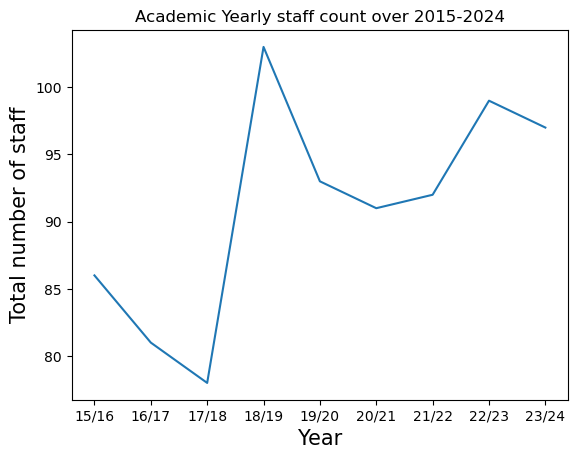

In [3]:
plt.plot(df["Year"], df["Total"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Total number of staff", fontsize=15)
plt.title("Academic Yearly staff count over 2015-2024")

Autocorrelation plot to determine ARIMA model

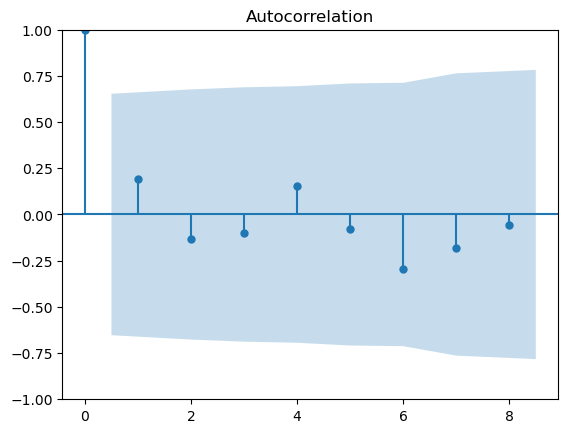

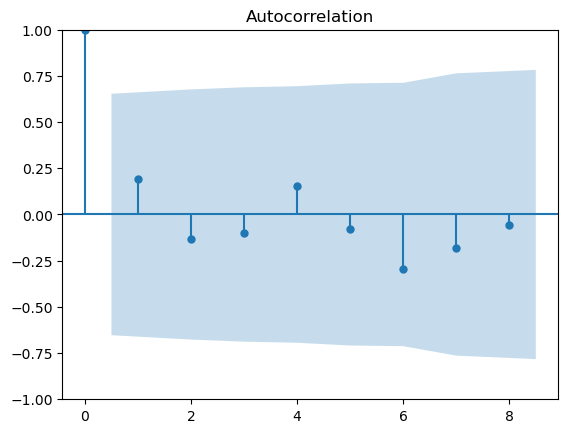

In [4]:
plot_acf(df["Total"])

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                    9
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 -28.031
Date:                Wed, 20 Mar 2024   AIC                             66.063
Time:                        23:14:55   BIC                             66.460
Sample:                             0   HQIC                            63.384
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5332      6.192     -0.086      0.931     -12.669      11.603
ar.L2         -0.4469      5.259     -0.085      0.932     -10.755       9.861
ar.L3         -0.3065      5.355     -0.057      0.9

/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


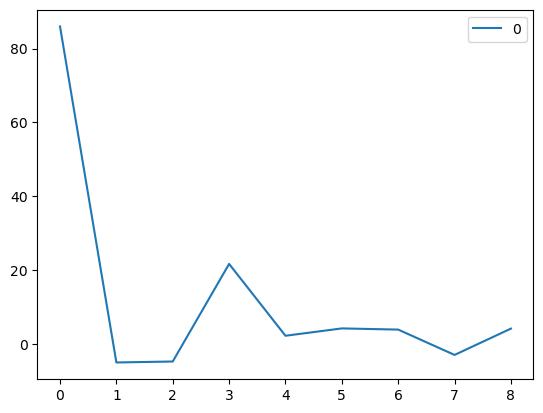

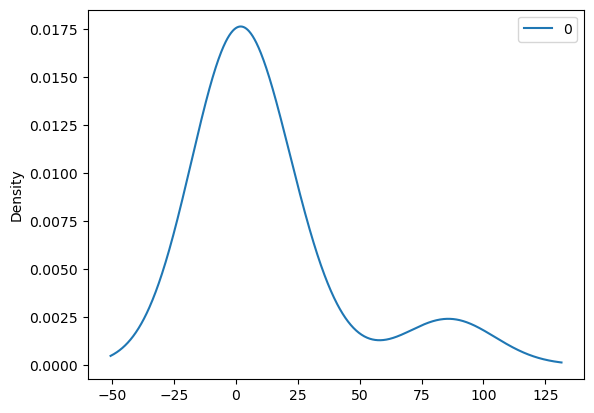

               0
count   9.000000
mean   12.173504
std    28.819109
min    -4.997046
25%    -2.950520
50%     3.909300
75%     4.227491
max    86.000000


In [5]:
model = ARIMA(df["Total"], order=(4,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

From the residual plot, there does not seem to be any trend information not captured by the model, as the mean is relevantly stable
The density plot shows that the errors are roughly Gaussian and roughly centers around 0, though the right tail may be a bit thicker and it is slightly biased as the mean is not 0

In [6]:
# split into train and test sets
X = df["Total"]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
print(train)
print(test)

0     86
1     81
2     78
3    103
4     93
Name: Total, dtype: int64
5    91
6    92
7    99
8    97
Name: Total, dtype: int64


Test + Validation

In [7]:
history = [x for x in train]
test_data = [x for x in test]
predictions = list()
# walk-forward validation
for t in range(len(test_data)):
 model = ARIMA(history, order=(4,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test_data[t]
 history.append(yhat)
 print('predicted=%f, expected=%f' % (yhat, obs), history)

predicted=85.779679, expected=91.000000 [86, 81, 78, 103, 93, 85.77967894589068]


/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=72.517370, expected=92.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266]
predicted=96.481162, expected=99.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266, 96.48116170850332]
predicted=96.481173, expected=97.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266, 96.48116170850332, 96.48117310089913]


/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [8]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(history)):
 model = ARIMA(history, order=(4,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = history[t]
 history.append(yhat)
 print('predicted=%f, expected=%f' % (yhat, obs), history)

training_error = 0
for i in range(len(train)):
  out = predictions[i] - history[i]
  out = out*out 
  training_error+=out

training_error = math.sqrt(training_error/len(train))
print('The training error for this regression model is:', training_error)

/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=85.779679, expected=86.000000 [86, 81, 78, 103, 93, 85.77967894589068]
predicted=72.517370, expected=81.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266]
predicted=96.481162, expected=78.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266, 96.48116170850332]
predicted=96.481173, expected=103.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266, 96.48116170850332, 96.48117310089913]
predicted=96.481170, expected=93.000000 [86, 81, 78, 103, 93, 85.77967894589068, 72.51737005536266, 96.48116170850332, 96.48117310089913, 96.48117049349493]
The training error for this regression model is: 9.676471902357926


/Users/sylvia/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# evaluate forecasts
rmse = math.sqrt(metrics.mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test_data)
plt.plot(predictions, color='red')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [4, 5]

Prediction

In [ ]:
pred = list()
data = [x for x in X]
pred_points = 3
for t in range(pred_points):
 model = ARIMA(data, order=(2,2,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 pred.append(yhat)
 obs = data[t]
 data.append(yhat)
 print('predicted=%f, expected=%f' % (yhat, obs), data)
 print(pred)

predicted=99.375262, expected=86.000000 [86, 81, 78, 103, 93, 91, 92, 99, 97, 99.37526180124937]
[99.37526180124937]
predicted=103.463039, expected=81.000000 [86, 81, 78, 103, 93, 91, 92, 99, 97, 99.37526180124937, 103.46303932157448]
[99.37526180124937, 103.46303932157448]
predicted=103.107993, expected=78.000000 [86, 81, 78, 103, 93, 91, 92, 99, 97, 99.37526180124937, 103.46303932157448, 103.107993423665]
[99.37526180124937, 103.46303932157448, 103.107993423665]


[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[86, 81, 78, 103, 93, 91, 92, 99, 97, 99.37526180124937, 103.46303932157448, 103.107993423665]


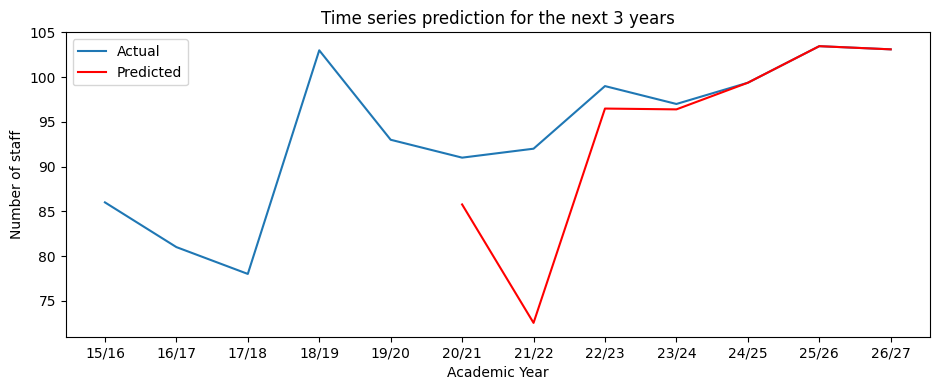

In [ ]:
idx = [int(x[:2]) for x in df["Year"]]
series = [x for x in X]
series += pred
for i in range(len(pred)):
    idx.append(idx[-1] * 2 - idx[-2])
print(idx)
print(series)
years = []
for year in idx:
    years.append(str(year) + "/" + str(year+1))
plt.figure(figsize=(9.5,4))
plt.plot(years, series, label="Actual")
plt.plot(years[len(data) - len(pred) - len(predictions):], predictions + pred, color='red', label="Predicted")
plt.xlabel('Academic Year', fontsize=10)
plt.ylabel('Number of staff', fontsize=10)
#plt.tick_params(axis='x',labelsize=7, labelrotation=0)
#plt.xticks(range(idx[0], idx[-1] + 1))
plt.title("Time series prediction for the next 3 years")
plt.legend(["Actual", "Predicted"])
plt.show()

It seems that due to the low autocorrelation of staff count, it is not very effective to predict staff count only based on itself through ARIMA. So we add more variables to see if we can have a better prediction

In [ ]:
df_var = pd.read_csv('../data/Call Volume.csv')
df_var


,Academic year beginning in Fall of:,Total UG enrollment,Total Enrollment,Total Employees,Enrollment + Employees,Calls (from academic year rpt),Calls / UG Enrollment,Calls / Total Enrollment,Calls/Total Enrollment + Employees
0,2010,3443,5878,NaN,NaN,800,0.232356,0.136101,NaN
1,2011,3667,6222,NaN,NaN,856,0.233433,0.137576,NaN
2,2012,3775,6478,NaN,NaN,771,0.204238,0.119018,NaN
3,2013,3885,6629,NaN,NaN,590,0.151866,0.089003,NaN
4,2014,3845,6621,NaN,NaN,624,0.162289,0.094246,NaN
5,2015,3839,6719,NaN,NaN,637,0.165929,0.094806,NaN
6,2016,3839,6855,3519.0,10374.0,640,0.166710,0.093363,0.061693
7,2017,3933,7022,3723.0,10745.0,583,0.148233,0.083025,0.054258
8,2018,3927,7080,3848.0,10928.0,650,0.165521,0.091808,0.059480
9,2019,3942,7108,3803.0,10911.0,541,0.137240,0.076111,0.049583


In [ ]:
df_var = df_var[["Academic year beginning in Fall of:", "Total UG enrollment", "Total Enrollment", "Total Employees", "Calls (from academic year rpt)"]]
df_var = df_var[5:]
df_var = df_var[:-1]
df_var["Merge"] = range(len(df_var))
df_var = df_var.dropna()
df_var

,Academic year beginning in Fall of:,Total UG enrollment,Total Enrollment,Total Employees,Calls (from academic year rpt),Merge
6,2016,3839,6855,3519.0,640,1
7,2017,3933,7022,3723.0,583,2
8,2018,3927,7080,3848.0,650,3
9,2019,3942,7108,3803.0,541,4
10,2020,4013,7257,3842.0,248,5
11,2021,4202,7819,3775.0,738,6
12,2022,4447,8272,4078.0,913,7
13,2023,4528,8225,4371.0,954,8


In [ ]:
df["Merge"] = range(len(df))
df

,Year,Volunteer,Paid,Total,Merge
0,15/16,52,34,86,0
1,16/17,51,30,81,1
2,17/18,48,30,78,2
3,18/19,75,28,103,3
4,19/20,69,24,93,4
5,20/21,69,22,91,5
6,21/22,64,28,92,6
7,22/23,73,26,99,7
8,23/24,67,30,97,8


In [ ]:
merged_df = pd.merge(df, df_var, on='Merge')
merged_df = merged_df[["Merge", "Volunteer", "Paid", "Total", "Total UG enrollment", "Total Enrollment", "Total Employees", "Calls (from academic year rpt)"]]
merged_df

,Merge,Volunteer,Paid,Total,Total UG enrollment,Total Enrollment,Total Employees,Calls (from academic year rpt)
0,1,51,30,81,3839,6855,3519.0,640
1,2,48,30,78,3933,7022,3723.0,583
2,3,75,28,103,3927,7080,3848.0,650
3,4,69,24,93,3942,7108,3803.0,541
4,5,69,22,91,4013,7257,3842.0,248
5,6,64,28,92,4202,7819,3775.0,738
6,7,73,26,99,4447,8272,4078.0,913
7,8,67,30,97,4528,8225,4371.0,954


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

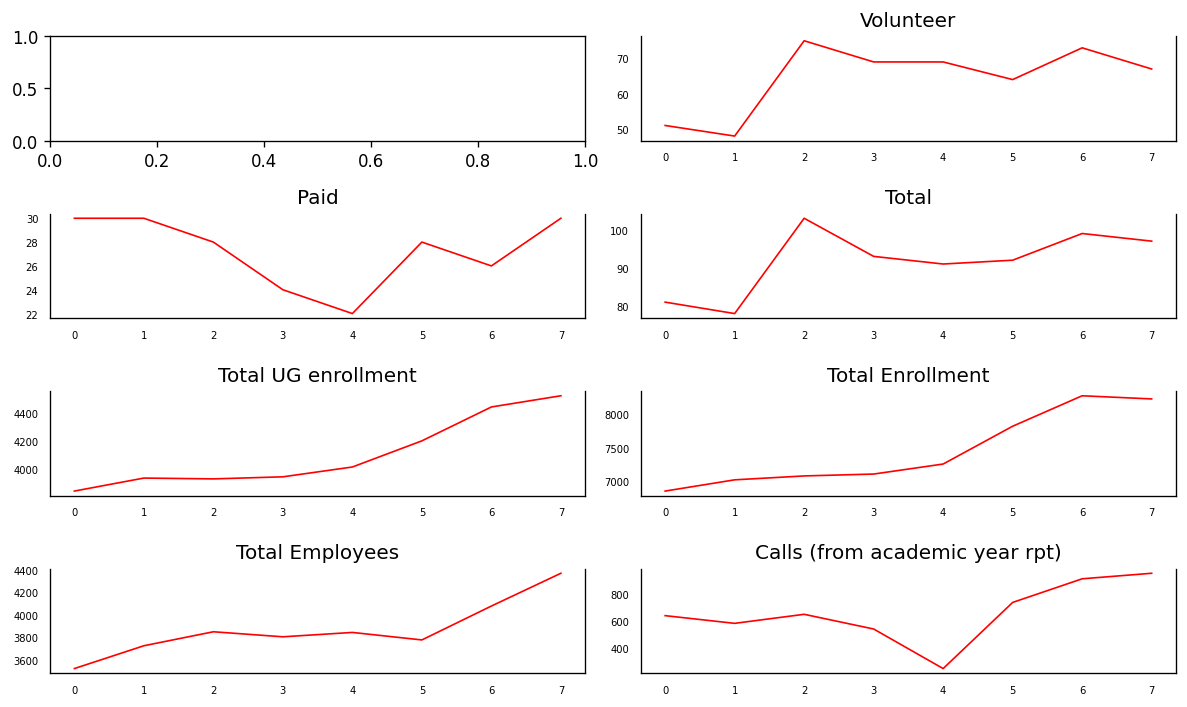

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
#print(merged_df.shape[1])
for i, ax in enumerate(axes.flatten()):
    #print(i)
    if 0 < i < merged_df.shape[1]:
        data = merged_df[merged_df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(merged_df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

plt.tight_layout()

Training and Testing

In [ ]:
size = int(0.66*len(merged_df))
df_train = merged_df.iloc[:size]  # Select the first 'size' rows
df_test = merged_df.iloc[size:]
print(df_train)
print(df_test)

   Merge  Volunteer  Paid  Total  Total UG enrollment  Total Enrollment  \
0      1         51    30     81                 3839              6855   
1      2         48    30     78                 3933              7022   
2      3         75    28    103                 3927              7080   
3      4         69    24     93                 3942              7108   
4      5         69    22     91                 4013              7257   

   Total Employees  Calls (from academic year rpt)  
0           3519.0                             640  
1           3723.0                             583  
2           3848.0                             650  
3           3803.0                             541  
4           3842.0                             248  
   Merge  Volunteer  Paid  Total  Total UG enrollment  Total Enrollment  \
5      6         64    28     92                 4202              7819   
6      7         73    26     99                 4447              8272   
7     

SARIMAX by Kevin (bad result)

C:\Users\zhaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


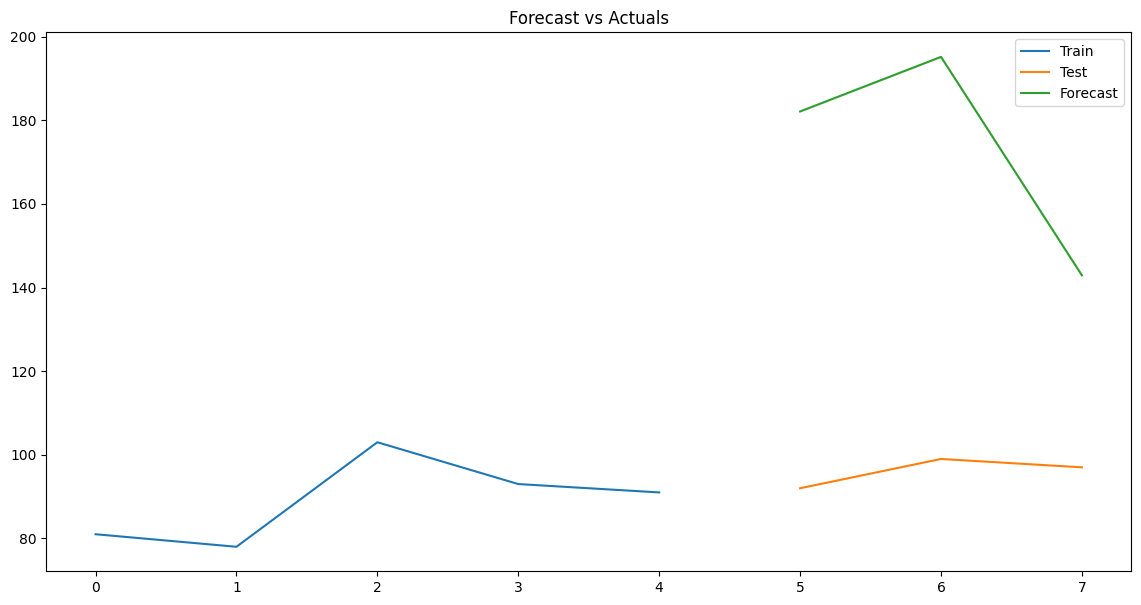

In [ ]:
# merged_df.to_csv('../data/temp.csv')
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df_train['Total'], order=(2, 0, 1), exog=df_train[['Total UG enrollment', 'Total Enrollment', 'Total Employees', 'Calls (from academic year rpt)']])
result = sarimax_model.fit()


forecast = result.get_forecast(steps=3, exog=df_test[['Total UG enrollment', 'Total Enrollment', 'Total Employees', 'Calls (from academic year rpt)']])
forecast

forecast_mean = forecast.predicted_mean

# Get confidence intervals of predictions
forecast_ci = forecast.conf_int()

# Plot the data along with the forecast and the confidence interval
plt.figure(figsize=(14, 7))
plt.plot(df_train.index, df_train['Total'], label='Train')
plt.plot(df_test.index, df_test['Total'], label='Test')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

VAR By Chelsea
https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/

In [ ]:
import statsmodels.api as sm
pred_years = 3
model = sm.tsa.VAR(df_train)
results = model.fit(2) # Autoregressive model of order p=2, due to the limited training samples p can only be 1 or 2
lag_order = results.k_ar
# Forecasting
forecast = results.forecast(df_test.values, steps=pred_years)
#forecast = results.forecast(df_test.values, steps=50)
#print(forecast)
#results.plot_forecast(50)

In [ ]:
forecast_df = pd.DataFrame(forecast)
forecast_df.columns = ['Merge', 'Volunteer', 'Paid', 'Total', 'Total UG enrollment', 'Total Enrollment', 'Total Employees', 'Calls (from academic year rpt)']
forecast_df = forecast_df[:len(df_test)]
forecast_df

,Merge,Volunteer,Paid,Total,Total UG enrollment,Total Enrollment,Total Employees,Calls (from academic year rpt)
0,3.265682,86.671079,32.956335,119.627414,4589.724867,8263.751034,4497.586493,893.821310
1,4.694038,82.120958,28.536129,110.657087,4633.001766,8358.195861,4475.653246,594.944755
2,5.783532,83.608835,26.907106,110.515942,4742.328579,8581.262189,4555.061476,253.071239


In [ ]:
forecast_staff = [x for x in forecast_df["Total"]]
test_staff = [x for x in df_test["Total"]]
train_staff = [x for x in df_train["Total"]]
print(type(forecast_staff))

<class 'list'>


RMSE - training error

In [ ]:
y_predicted = results.forecast(df_train.values, steps=len(df_train)) #predicted y-value at point x, where y_train is the actual y-value at x
train_preds = []
for y_pred in y_predicted:
  train_preds.append(y_pred[3])
training_error = 0
#print(y_preds)
for i in range(len(df_train)):
  out = train_preds[i] - df_train['Total'][i]
  out = out*out 
  training_error+=out

training_error = math.sqrt(training_error/len(df_train))
print('The training error for this regression model is:', training_error)

The training error for this regression model is: 13.868597184797652


RMSE - testing error

In [ ]:
Rmse = math.sqrt(metrics.mean_squared_error(forecast_staff, test_staff))
print('The testing error for this regression model is:', Rmse)

The testing error for this regression model is: 18.989842399921997


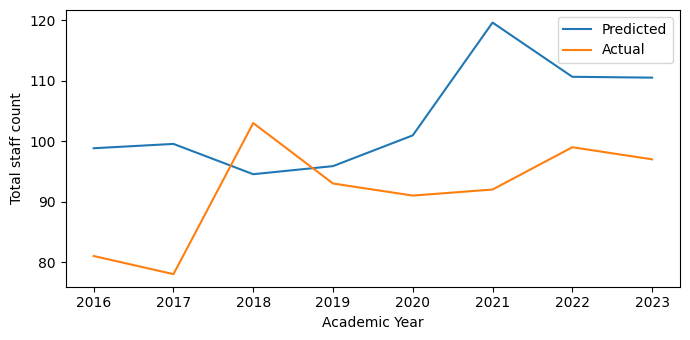

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x_axis = df_var["Academic year beginning in Fall of:"]
plt.plot(x_axis, train_preds + forecast_staff)
plt.plot(x_axis, train_staff + test_staff)

plt.xticks(x_axis)
plt.xlabel('Academic Year')
plt.ylabel('Total staff count')
plt.legend(["Predicted", "Actual"])


In [ ]:
model = sm.tsa.VAR(merged_df)
results = model.fit(2)
new_df = merged_df.copy()
output = results.forecast(merged_df.values, steps=pred_years)
# print(output)
output_df = pd.DataFrame(output)
# print(output_df[0])
output_df = output_df.rename(columns={0: "Merge", 1: "Volunteer", 2: "Paid", 3: "Total", 4: "Total UG enrollment", 5: "Total Enrollment", 6: "Total Employees", 7: "Calls (from academic year rpt)"})
output_df
future_df = merged_df.append(output_df, ignore_index = True)
print(future_df)

# output_df = {"Merge": output[0], "Volunteer": yhat[1], "Paid": yhat[2], "Total": yhat[3], "Total UG enrollment": yhat[4], "Total Enrollment": yhat[5], "Total Employees": yhat[6], "Calls (from academic year rpt)": yhat[7]}
# prediction_df = merged_df.append(output, ignore_index=True)
# for t in range(pred_years):
#  output = results.forecast(new_df.values, steps=1)
#  print(output)
#  yhat = output[0]
#  predicted.append(yhat)
#  df_yhat = {"Merge": yhat[0], "Volunteer": yhat[1], "Paid": yhat[2], "Total": yhat[3], "Total UG enrollment": yhat[4], "Total Enrollment": yhat[5], "Total Employees": yhat[6], "Calls (from academic year rpt)": yhat[7]}
#  new_df = new_df.append(df_yhat, ignore_index=True)
#  print('predicted=%f, expected=%f' % (yhat, obs), data)
#  print(predicted)
#  print(yhat)

       Merge  Volunteer       Paid       Total  Total UG enrollment  \
0   1.000000  51.000000  30.000000   81.000000          3839.000000   
1   2.000000  48.000000  30.000000   78.000000          3933.000000   
2   3.000000  75.000000  28.000000  103.000000          3927.000000   
3   4.000000  69.000000  24.000000   93.000000          3942.000000   
4   5.000000  69.000000  22.000000   91.000000          4013.000000   
5   6.000000  64.000000  28.000000   92.000000          4202.000000   
6   7.000000  73.000000  26.000000   99.000000          4447.000000   
7   8.000000  67.000000  30.000000   97.000000          4528.000000   
8   6.823771  68.113188  26.421179   94.534367          4468.449320   
9   5.287675  73.585388  25.495179   99.080567          4455.400539   
10  5.609115  76.319569  29.213489  105.533058          4676.971426   

    Total Enrollment  Total Employees  Calls (from academic year rpt)  
0        6855.000000      3519.000000                      640.000000  
1  

C:\Users\zhaox\AppData\Local\Temp\ipykernel_29176\4141419701.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = merged_df.append(output_df, ignore_index = True)


[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[81.0, 78.0, 103.0, 93.0, 91.0, 92.0, 99.0, 97.0, 94.53436667919078, 99.0805666703547, 105.53305842904803]


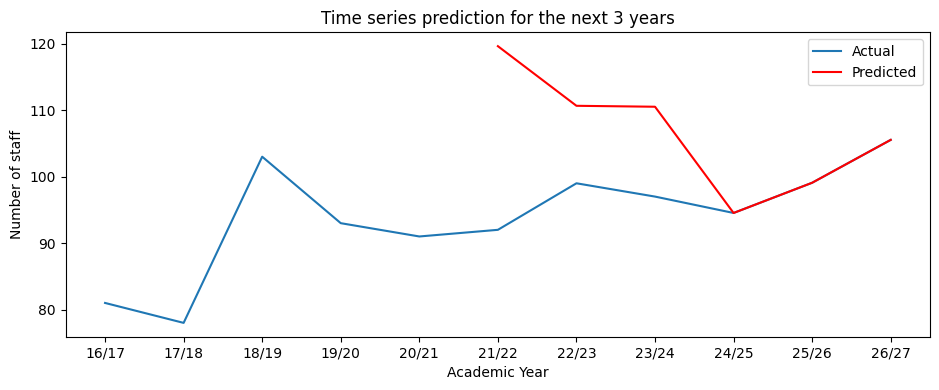

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
idx = [int(x[:2]) for x in df["Year"]]
idx = idx[1:]
series = [x for x in future_df["Total"]]
for i in range(pred_years):
    idx.append(idx[-1] * 2 - idx[-2])
print(idx)
print(series)
years = []
for year in idx:
    years.append(str(year) + "/" + str(year+1))
# print(years)
plt.figure(figsize=(9.5,4))
plt.plot(years, series, label='Actual')
plt.plot(years[len(series) - pred_years - len(forecast_staff):], forecast_staff + series[len(series) - pred_years:], color='red', label='Forecast')
plt.xlabel('Academic Year', fontsize=10)
plt.ylabel('Number of staff', fontsize=10)
#plt.tick_params(axis='x',labelsize=7, labelrotation=0)
#plt.xticks(range(idx[0], idx[-1] + 1))
plt.title("Time series prediction for the next 3 years")
plt.legend(["Actual", "Predicted"])
plt.show()

Not working below

In [ ]:
import statsmodels.api as sm
model = sm.tsa.VARMAX(df_train, order=(3,1,1), enforce_stationarity=False, enforce_invertibility=False, error_cov_type='diagonal')
results = model.fit()

# Predictions
prediction = results.predict(start=len(df_train), end=len(df_train)+10)

print(prediction)

C:\Users\zhaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\zhaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:658: RuntimeWarning: invalid value encountered in sqrt
  constrained[self._params_state_cov]**0.5)


LinAlgError: Schur decomposition solver error.

In [ ]:
import pmdarima as pm
from pmdarima import model_selection


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import rmse
dat.index = pd.to_datetime(dat.index)
training = dat.iloc[:size]  # Select the first 'size' rows
testing = dat.iloc[size:]   # Select the remaining rows
array = training.values
# Reshape the array
reshaped_array = array.reshape(-1, 7)

# If you want to convert the reshaped array back to a DataFrame
reshaped_df = pd.DataFrame(reshaped_array, columns=training.columns)
print(reshaped_array.shape)
print(reshaped_array.dtype)
#training = training.reshape(-1, 7)
#print(type(training["Volunteer"][1]))
model = VARMAX(reshaped_df, order=(4, 1))
fitted_model = model.fit(disp=False)

#print(dat)
#dat["Year"] = [int(x[:2]) for x in dat["Year"]]
#print(dat)
#model = ARIMA(merged_df, order=(4,1,0))
#np.asarray(dat)
#model = VAR(endog=training)
#model_fit = model.fit()

# make prediction on validation
#prediction = model_fit.forecast(model_fit.y, steps=len(testing))

(5, 7)
float64


C:\Users\zhaox\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'


LinAlgError: 1-dimensional array given. Array must be two-dimensional